# Reconnaissance de chiffres manuscrites à l'aide du Deep Learning

## 1. Introduction

### Le jeu de données MNIST

Parmi les milliers de jeux de données disponibles sur le marché, MNIST est le jeu de données le plus populaire pour les amateurs d'apprentissage automatique et d'apprentissage profond. Plus de 60.000 images d'entraînement de chiffres manuscrits de zéro à neuf et plus de 10.000 images de test sont présentes dans le jeu de données MNIST. 

L'ensemble de données MNIST comprend donc 10 classes différentes (pour chaque chiffre, de 0 à 9). <br>
Les images de chiffres manuscrits sont présentées sous la forme d'une matrice de 28×28 où chaque cellule est constituée d'une valeur de pixel en niveaux de gris.

## 2. Import des librairies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

2023-01-18 17:34:30.281732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 3. Chargement du dataset

In [2]:
#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

La bibliothèque Keras contient déjà de nombreux jeux de données et MNIST est l'un d'entre eux. 

Nous appelons la fonction mnist.load_data() pour obtenir les données d'entraînement avec leurs étiquettes et également les données de test avec leurs étiquettes.

Affichons quelques exemples : 

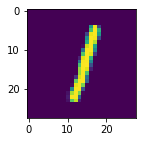

In [3]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[2301])

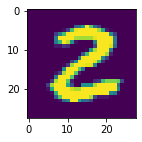

In [4]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[25])

## 4. Prétraitement des données

Le modèle de deep learning ne peut prendre les données d'image en entrée directement.

Nous devons effectuer quelques traitements pour rendre les données prêtes pour nos réseaux neuronnes.

In [5]:
x_train.shape

(60000, 28, 28)

La dimension des données d'entrainement est de (60000, 28, 28). 

Une dimension supplémentaire est nécessaire pour le modèle CNN, nous remodelons donc la matrice pour lui donner la forme (60000, 28, 28, 1).

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## 5. Création du modèle

Il est temps de créer le modèle CNN pour ce projet de science des données basé sur Python. 

Une couche convolutive (convolutional layer) et des pooling layers sont les deux roues d'un modèle CNN. La raison du succès du CNN pour les problèmes de classification d'images est sa faisabilité avec des données structurées en grille. 

Nous utiliserons l'optimiseur Adadelta pour la compilation du modèle.

In [9]:
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

2023-01-18 17:34:40.335521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 6. Entrainement du modèle

Pour commencer l'entraînement du modèle, nous pouvons simplement appeler la fonction model.fit() de Keras. Elle prend les données d'entraînement, les données de validation, les époques et la taille du lot comme paramètres.

L'entraînement du modèle prend un certain temps. Après un entraînement réussi du modèle, nous pouvons enregistrer les poids et la définition du modèle dans le fichier 'mnist.h5'.

In [10]:
hist = model.fit(x_train, 
                 y_train,
                 batch_size=128,
                 epochs=10,
                 verbose=1,
                 validation_data=(x_test, y_test))

print("The model has successfully trained")
model.save('my_model.h5')
print("Saving the bot as my_model.h5")

Epoch 1/10
469/469 [==============================] - 116s 246ms/step - loss: 2.2754 - accuracy: 0.1665 - val_loss: 2.2397 - val_accuracy: 0.4034
Epoch 2/10
469/469 [==============================] - 121s 258ms/step - loss: 2.2174 - accuracy: 0.2973 - val_loss: 2.1665 - val_accuracy: 0.5492
Epoch 3/10
469/469 [==============================] - 123s 262ms/step - loss: 2.1387 - accuracy: 0.4111 - val_loss: 2.0645 - val_accuracy: 0.6487
Epoch 4/10
469/469 [==============================] - 140s 299ms/step - loss: 2.0280 - accuracy: 0.5097 - val_loss: 1.9221 - val_accuracy: 0.7097
Epoch 5/10
469/469 [==============================] - 124s 264ms/step - loss: 1.8765 - accuracy: 0.5809 - val_loss: 1.7293 - val_accuracy: 0.7645
Epoch 6/10
469/469 [==============================] - 110s 235ms/step - loss: 1.6825 - accuracy: 0.6373 - val_loss: 1.4904 - val_accuracy: 0.8017
Epoch 7/10
469/469 [==============================] - 104s 222ms/step - loss: 1.4607 - accuracy: 0.6765 - val_loss: 1.2372 -

## 7. Evaluation du modèle

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7371471524238586
Test accuracy: 0.8446999788284302
